### 回归问题到分类问题

和逻辑斯蒂回归的区别是什么？

先来看看逻辑斯蒂回归，它的激活函数是 sigmoid 函数，而 sigmoid 函数的输出值是一个连续的值，最终使用的损失函数，也就是误差度量的函数是 均方误差。于此相对的还有绝对值误差MSE，还有其他的误差度量等方式，所以这时候是不是对误差度量这个概念有了更深刻的理解。

在书中 ==> 用损失函数 替换了 误差度量方式 的概念

再来看 softmax 回归，它最终用的误差度量的函数是 交叉熵，所以这里说的损失函数指的是最终的误差度量方式而不是指的构造出的那个损失函数的概念。不是概念！而是指误差度量方式！

指数的好处是不论 $o_{i}$ 是什么，都能够转化成非负：

$$
\begin{aligned}
\hat{\mathbf{y}} &=\operatorname{softmax}(\mathbf{o}) \\
\hat{y}_{i} &=\frac{\exp \left(o_{i}\right)}{\sum_{k} \exp \left(o_{k}\right)}
\end{aligned}
$$

当使用 one-hot 编码后，原本的类别标签 y，也可以通过 softmax 计算后变成一个概率值了。这样以来就可以使用神经网络的输出值与 y 之间构成误差计算的损失函数。 

### 交叉熵

这里的 p 和 q 是离散的概率分布向量

交叉熵计算的是：两个概率分布之间的差异，并且交叉熵是不对称的，也就是 p,q 传入的顺序不同，则计算出来的结果也是不同的

H(p, q) ==> p 和 q 的概率分布差异越大，则 p 相对于 q 的交叉熵比 p 的信息熵越大

$$
H(\mathbf{p}, \mathbf{q})=\sum_{i}-p_{i} \log \left(q_{i}\right)
$$

In [103]:
import matplotlib.pyplot as plt
import numpy as np
def cross_entropy(p, q): # p 相对于 q 的交叉熵，p 在 log 函数上
    return np.sum(-q*np.log(p)) # 默认以 e 为底

def entropy(y):
    return np.sum(-y*np.log(y))

In [104]:
scatter = np.linspace(0.01, 0.99, 100)

# x 是越来越大的
all_y = [np.array([x, 1-x]) for x in scatter]
all_y_hat = [np.array([1-x, x]) for x in scatter]

all_cross_entropy = [cross_entropy(all_y[i], all_y_hat[i]) for i in range(len(all_y))]

In [105]:
x = scatter
y = all_cross_entropy

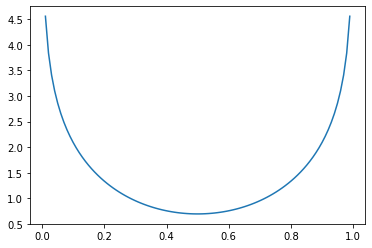

In [106]:
plt.plot(x, y)
plt.show()

### 最好的交叉熵

什么时候交叉熵的值最小，就是当两个概率分布完全一致的时候，交叉熵达到最小值，但是有一个理论是：p 相对于 q 的交叉熵总是大于 p 的信息熵的，只不过 p 和 q 的分布差异越大，则 p 相对于 q 的交叉熵比 p 的交叉熵大的越多，也就是说 p 的信息熵是 p 相对于 q 的交叉熵的下界，那么下边就来试验一下这个猜测

In [107]:
y_true = np.array([0.5, 0.5]) # y_true 是真实的概率分布
y_hat = np.array([0.5, 0.5]) # y_hat 是预测的概率分布

In [108]:
# 计算 y_true 的信息熵
entropy(y_true)

0.6931471805599453

In [109]:
# 计算 y_true 相对于 y_hat 的交叉熵
# 在上边的代码中 cross_entropy(all_y[i], all_y_hat[i])
# 这个也是真实的概率分布相对于预测的概率分布的交叉熵，这个保持一致
cross_entropy(y_true, y_hat)

0.6931471805599453

通过下边的代码就验证了，上述的猜想在这个试验中是正确的，实际上，当两者的概率分布相同的时候，那也就是说明了 p 和 q 就是等价的，替换一下其中的字母，这样一来交叉熵的公式就等价于信息熵的公式了！所以，这个时候交叉熵和信息熵的值也就是相等的了！

说明：p 相对于 q 的交叉熵的下限是 p 的信息熵 ==> p 在 log 的位置上

但是：q 相对于 p 的交叉熵的下线不是 p 的信息熵而是 q 的信息熵，所以才说交叉熵是不对称的

In [110]:
entropy(y_true) == cross_entropy(y_true, y_hat)

True

这里的 P 是一个概率分布向量，Q 也是一个概率分布向量，log(P) 是 P 产生的 非加权的惊异程度，而 $H(P)$ 则是 P 产生的并且加权后的 惊异程度。另外，关于 H(P, Q) 的理解，则是 Q 对 log(P) 的加权后的惊异程度。

为什么起个名字叫 惊异程度？就是很惊奇？看到别人家的概率分布和自己不一样就很差异？很奇怪？哇哦，这个世界上还有和自己如此不同的人，还有与自己如此不同的概率分布啊！

如果把熵$H(P)$想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？
交叉熵*从*$P$*到*$Q$，记为$H(P, Q)$。
你可以把交叉熵想象为“主观概率为$Q$的观察者在看到根据概率$P$生成的数据时的预期惊异”。
当$P=Q$时，交叉熵达到最低。
在这种情况下，从$P$到$Q$的交叉熵是$H(P, P)= H(P)$。